In [28]:
# 필요한 모듈 import
import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# numpy 와 pandas 는 1차원 또는 2차원 형식의 표 데이터를 다루기에 최적화된 라이브러리
import pandas as pd # Deal with DataFrame with Pandas library
import numpy as np # data processing, CSV file I/O (e.g. pd.read_csv)

# seaborn과 matplotlib 은 데이터를 그래프 등으로 시각화 할 때 사용 (seaborn 이 고급, matplotlib는 단순 & raw)
import seaborn as sns # Draw graph with SNS library 
import matplotlib.pyplot as plt # Draw graph with matplotlib library
%matplotlib inline
%config lnlineBackend.figure_format = 'retina'

In [50]:
# 데이터 불러오기
case = pd.read_csv('Case.csv')
pat_info = pd.read_csv('PatientInfo.csv')
policy = pd.read_csv('Policy.csv')
region = pd.read_csv('Region.csv')
search_trend = pd.read_csv('SearchTrend.csv')
seoul_floating = pd.read_csv('SeoulFloating.csv')
time = pd.read_csv('Time.csv')
time_age = pd.read_csv('TimeAge.csv')
time_gender = pd.read_csv('TimeGender.csv')
time_province = pd.read_csv('TimeProvince.csv')
weather = pd.read_csv('Weather.csv')

In [4]:
case

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374
...,...,...,...,...,...,...,...,...
169,6100012,Gyeongsangnam-do,-,False,etc,20,-,-
170,7000001,Jeju-do,-,False,overseas inflow,14,-,-
171,7000002,Jeju-do,-,False,contact with patient,0,-,-
172,7000003,Jeju-do,-,False,etc,4,-,-


In [12]:
patient_info

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5160,7000000015,female,30s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,25,NaN,2020-05-30,2020-06-13,NaN,released
5161,7000000016,NaN,NaN,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-16,2020-06-24,NaN,released
5162,7000000017,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,72,NaN,2020-06-18,NaN,NaN,isolated
5163,7000000018,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated


In [7]:
policy

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN
...,...,...,...,...,...,...,...
56,57,Korea,Transformation,Logistics center,On-site inspection of major logistics faciliti...,2020-05-29,2020-06-11
57,58,Korea,Transformation,Wearing of masks,"Mandatory wearing of passenger mask domestic, ...",2020-05-27,NaN
58,59,Korea,Transformation,Wearing of masks,Drivers such as buses and taxis can refuse to ...,2020-05-26,NaN
59,60,Korea,Technology,KI-Pass: Korea Internet - Pass,new quick response (QR) code system this week ...,2020-06-10,NaN


In [9]:
region

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
3,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080
...,...,...,...,...,...,...,...,...,...,...,...,...
239,61160,Gyeongsangnam-do,Haman-gun,35.272481,128.406540,16,20,0,1.19,23.74,14.7,94
240,61170,Gyeongsangnam-do,Hamyang-gun,35.520541,127.725177,13,12,0,1.01,32.65,20.9,83
241,61180,Gyeongsangnam-do,Hapcheon-gun,35.566702,128.165870,17,15,0,0.71,38.44,24.7,96
242,70000,Jeju-do,Jeju-do,33.488936,126.500423,113,123,4,1.53,15.10,6.4,1245


In [13]:
search_trend

,date,cold,flu,pneumonia,coronavirus
0,2016-01-01,0.11663,0.05590,0.15726,0.00736
1,2016-01-02,0.13372,0.17135,0.20826,0.00890
2,2016-01-03,0.14917,0.22317,0.19326,0.00845
3,2016-01-04,0.17463,0.18626,0.29008,0.01145
4,2016-01-05,0.17226,0.15072,0.24562,0.01381
...,...,...,...,...,...
1637,2020-06-25,0.12072,0.04190,0.11936,2.16993
1638,2020-06-26,0.11381,0.03027,0.11317,2.15139
1639,2020-06-27,0.10554,0.02136,0.08354,1.96848
1640,2020-06-28,0.12563,0.02872,0.08072,2.19720


In [15]:
seoul_floating

,date,hour,birth_year,sex,province,city,fp_num
0,2020-01-01,0,20,female,Seoul,Dobong-gu,19140
1,2020-01-01,0,20,male,Seoul,Dobong-gu,19950
2,2020-01-01,0,20,female,Seoul,Dongdaemun-gu,25450
3,2020-01-01,0,20,male,Seoul,Dongdaemun-gu,27050
4,2020-01-01,0,20,female,Seoul,Dongjag-gu,28880
...,...,...,...,...,...,...,...
1084795,2020-05-31,21,40,female,Seoul,Dobong-gu,27620
1084796,2020-05-31,21,40,female,Seoul,Songpa-gu,56560
1084797,2020-05-31,21,50,female,Seoul,Gangdong-gu,38960
1084798,2020-05-31,22,60,female,Seoul,Guro-gu,25420


In [17]:
time

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0
...,...,...,...,...,...,...,...
158,2020-06-26,0,1232315,1200885,12602,11172,282
159,2020-06-27,0,1243780,1211261,12653,11317,282
160,2020-06-28,0,1251695,1219975,12715,11364,282
161,2020-06-29,0,1259954,1228698,12757,11429,282


In [20]:
time_age

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1
...,...,...,...,...,...
1084,2020-06-30,0,40s,1681,3
1085,2020-06-30,0,50s,2286,15
1086,2020-06-30,0,60s,1668,41
1087,2020-06-30,0,70s,850,82


In [22]:
time_gender

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20
...,...,...,...,...,...
237,2020-06-28,0,female,7265,131
238,2020-06-29,0,male,5470,151
239,2020-06-29,0,female,7287,131
240,2020-06-30,0,male,5495,151


In [25]:
time_province

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0
3,2020-01-20,16,Incheon,1,0,0
4,2020-01-20,16,Gwangju,0,0,0
...,...,...,...,...,...,...
2766,2020-06-30,0,Jeollabuk-do,27,21,0
2767,2020-06-30,0,Jeollanam-do,24,19,0
2768,2020-06-30,0,Gyeongsangbuk-do,1389,1328,54
2769,2020-06-30,0,Gyeongsangnam-do,134,128,0


In [26]:
weather

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,10000,Seoul,2016-01-01,1.2,-3.3,4.0,0.0,3.5,90.0,73.0
1,11000,Busan,2016-01-01,5.3,1.1,10.9,0.0,7.4,340.0,52.1
2,12000,Daegu,2016-01-01,1.7,-4.0,8.0,0.0,3.7,270.0,70.5
3,13000,Gwangju,2016-01-01,3.2,-1.5,8.1,0.0,2.7,230.0,73.1
4,14000,Incheon,2016-01-01,3.1,-0.4,5.7,0.0,5.3,180.0,83.9
...,...,...,...,...,...,...,...,...,...,...
26266,50000,Jeollabuk-do,2020-06-29,22.0,19.7,26.5,27.6,4.4,90.0,85.1
26267,51000,Jeollanam-do,2020-06-29,21.9,20.0,24.0,80.5,16.8,90.0,97.9
26268,60000,Gyeongsangbuk-do,2020-06-29,20.4,17.4,24.5,43.9,4.5,160.0,90.9
26269,61000,Gyeongsangnam-do,2020-06-29,21.9,18.8,25.5,98.9,5.8,160.0,85.0


### time 에 따른 2020코로나19 분석_한국

https://www.kaggle.com/imthewon/2020-19

In [36]:
type(time)

pandas.core.frame.DataFrame

<AxesSubplot:>

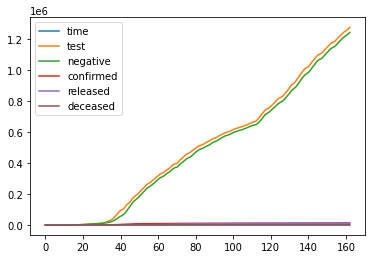

In [37]:
time.plot.line()

In [38]:
time.set_index('date', inplace=True)
time

,time,test,negative,confirmed,released,deceased
date,,,,,,
2020-01-20,16,1,0,1,0,0
2020-01-21,16,1,0,1,0,0
2020-01-22,16,4,3,1,0,0
2020-01-23,16,22,21,1,0,0
2020-01-24,16,27,25,2,0,0
...,...,...,...,...,...,...
2020-06-26,0,1232315,1200885,12602,11172,282
2020-06-27,0,1243780,1211261,12653,11317,282
2020-06-28,0,1251695,1219975,12715,11364,282


<AxesSubplot:xlabel='date'>

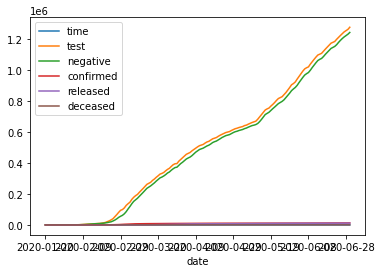

In [39]:
time.plot.line()

<AxesSubplot:xlabel='date'>

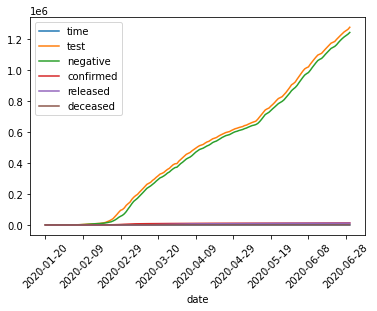

In [40]:
time.plot.line(rot=45)

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

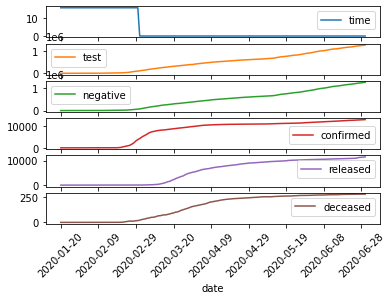

In [42]:
time.plot.line(rot=45, subplots=True)

# 아이디어 1. 20-30대 확진자가 어느 구에서 많이 나오는지?

patient_info 를 가지고 연령별 로 정리해서 2~30대로 추스리기

In [51]:
pat_info

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5160,7000000015,female,30s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,25,NaN,2020-05-30,2020-06-13,NaN,released
5161,7000000016,NaN,NaN,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-16,2020-06-24,NaN,released
5162,7000000017,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,72,NaN,2020-06-18,NaN,NaN,isolated
5163,7000000018,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated


In [52]:
print(pat_info)

      patient_id     sex  age     country province         city  \
0     1000000001    male  50s       Korea    Seoul   Gangseo-gu   
1     1000000002    male  30s       Korea    Seoul  Jungnang-gu   
2     1000000003    male  50s       Korea    Seoul    Jongno-gu   
3     1000000004    male  20s       Korea    Seoul      Mapo-gu   
4     1000000005  female  20s       Korea    Seoul  Seongbuk-gu   
...          ...     ...  ...         ...      ...          ...   
5160  7000000015  female  30s       Korea  Jeju-do      Jeju-do   
5161  7000000016     NaN  NaN       Korea  Jeju-do      Jeju-do   
5162  7000000017     NaN  NaN  Bangladesh  Jeju-do      Jeju-do   
5163  7000000018     NaN  NaN  Bangladesh  Jeju-do      Jeju-do   
5164  7000000019     NaN  NaN  Bangladesh  Jeju-do      Jeju-do   

            infection_case infected_by contact_number symptom_onset_date  \
0          overseas inflow         NaN             75         2020-01-22   
1          overseas inflow         NaN     

In [5]:
y = patient_info['patient_id']
del patient_info['patient_id']

print(patient_info.columns)

Index(['sex', 'age', 'country', 'province', 'city', 'infection_case',
       'infected_by', 'contact_number', 'symptom_onset_date', 'confirmed_date',
       'released_date', 'deceased_date', 'state'],
      dtype='object')


In [6]:
patient_info.head()

,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [7]:
a = patient_info['infected_by']
del patient_info['infected_by']

print(patient_info.columns)

Index(['sex', 'age', 'country', 'province', 'city', 'infection_case',
       'contact_number', 'symptom_onset_date', 'confirmed_date',
       'released_date', 'deceased_date', 'state'],
      dtype='object')


In [9]:
patient_info.head()

,sex,age,country,province,city,infection_case,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,31,NaN,2020-01-30,2020-03-02,NaN,released
2,male,50s,Korea,Seoul,Jongno-gu,contact with patient,17,NaN,2020-01-30,2020-02-19,NaN,released
3,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,2,NaN,2020-01-31,2020-02-24,NaN,released


In [10]:
b = patient_info['symptom_onset_date']
del patient_info['symptom_onset_date']

print(patient_info.columns)

Index(['sex', 'age', 'country', 'province', 'city', 'infection_case',
       'contact_number', 'confirmed_date', 'released_date', 'deceased_date',
       'state'],
      dtype='object')


In [11]:
patient_info.head()

,sex,age,country,province,city,infection_case,contact_number,confirmed_date,released_date,deceased_date,state
0,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,75,2020-01-23,2020-02-05,NaN,released
1,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,31,2020-01-30,2020-03-02,NaN,released
2,male,50s,Korea,Seoul,Jongno-gu,contact with patient,17,2020-01-30,2020-02-19,NaN,released
3,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,9,2020-01-30,2020-02-15,NaN,released
4,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,2,2020-01-31,2020-02-24,NaN,released


In [15]:
d = patient_info['deceased_date']
del patient_info['deceased_date']

print(patient_info.columns)

Index(['sex', 'age', 'country', 'province', 'city', 'infection_case',
       'contact_number', 'released_date', 'state'],
      dtype='object')


In [16]:
patient_info.head()

,sex,age,country,province,city,infection_case,contact_number,released_date,state
0,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,75,2020-02-05,released
1,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,31,2020-03-02,released
2,male,50s,Korea,Seoul,Jongno-gu,contact with patient,17,2020-02-19,released
3,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,9,2020-02-15,released
4,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,2,2020-02-24,released


In [17]:
e = patient_info['state']
del patient_info['state']

print(patient_info.columns)

Index(['sex', 'age', 'country', 'province', 'city', 'infection_case',
       'contact_number', 'released_date'],
      dtype='object')


In [19]:
patient_info.head()

,sex,age,country,province,city,infection_case,contact_number,released_date
0,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,75,2020-02-05
1,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,31,2020-03-02
2,male,50s,Korea,Seoul,Jongno-gu,contact with patient,17,2020-02-19
3,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,9,2020-02-15
4,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,2,2020-02-24


In [30]:
print(patient_info.shape)

(5165, 8)


In [31]:
# 20대 데이터셋
twenties = patient_info[patient_info['age'] == 20s].reset_index(drop=True)
print(twenties.shape)

SyntaxError: invalid syntax (<ipython-input-31-e87eb5d6c3e5>, line 2)

In [35]:
patient_info.plot.line()

TypeError: no numeric data to plot

### 참고 레퍼런스

Covid-19, South Korea Patient Info & Case Analysis

https://www.kaggle.com/eamartey/covid-19-south-korea-patient-info-case-analysis

1. Analyzing the first dataset

In [53]:
case.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374


## A bar plot of confirmed cases and province shows Daegu as having the most number of cases

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='confirmed', ylabel='province'>

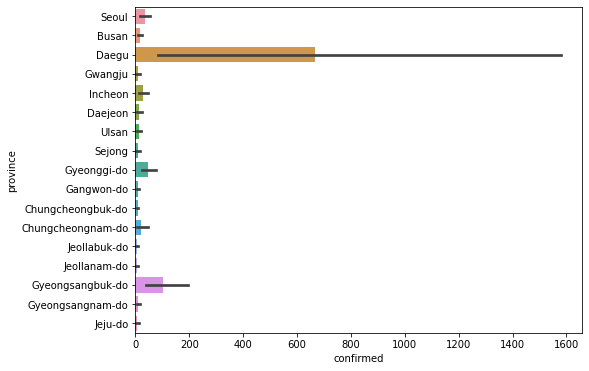

In [54]:
plt.figure(figsize = (8,6))
sns.barplot('confirmed', 'province', data = case)

## Most of the infections happened in Shincheonji church, then the hospitals

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='confirmed', ylabel='infection_case'>

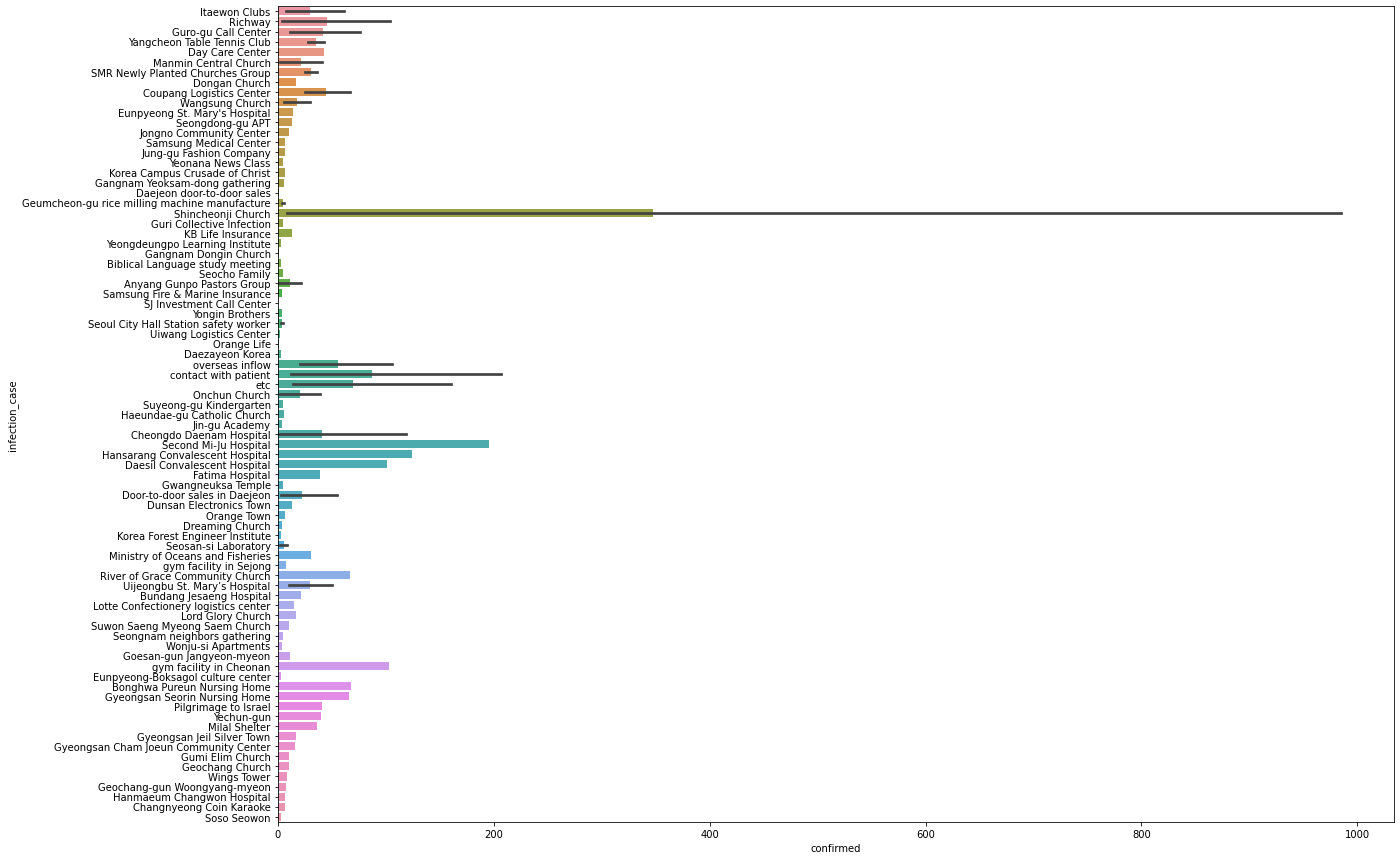

In [55]:
plt.figure(figsize = (20, 15)) 
sns.barplot('confirmed','infection_case', data = case)

## Most infected city is Nam-gu

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='confirmed', ylabel='city'>

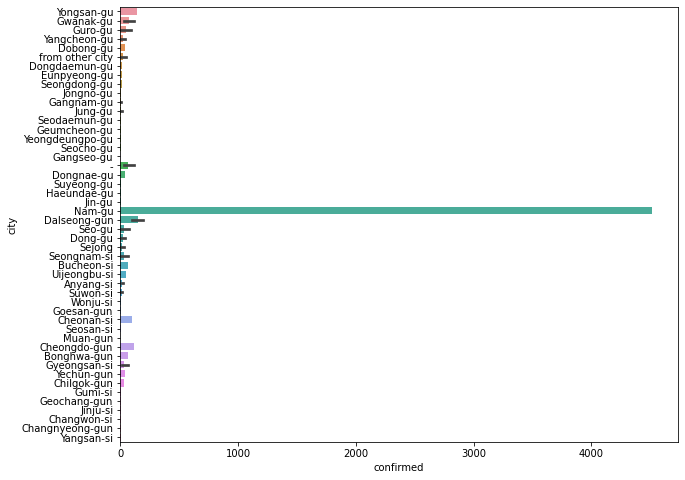

In [56]:
plt.figure(figsize = (10,8)) 
sns.barplot('confirmed','city', data = case)

## To find out which province and city Shincheonji Church (the most infected place) is in I grouped the data by province, city and infection_case.

### Shincheonji Church is in the province of Daegu in the city of Nam-gu, all of which are the highest infected places

In [57]:
d = case.groupby(['province','city','infection_case']).sum()

In [58]:
pd.set_option('display.max_rows', d.shape[0]+1)
pd.set_option('display.max_columns', d.shape[0]+1)

In [59]:
d

case_id  \
province          city            infection_case                                            
Busan             -               contact with patient                            1100009   
                                  etc                                             1100010   
                                  overseas inflow                                 1100008   
                  Dongnae-gu      Onchun Church                                   1100001   
                  Haeundae-gu     Haeundae-gu Catholic Church                     1100004   
                  Jin-gu          Jin-gu Academy                                  1100005   
                  Suyeong-gu      Suyeong-gu Kindergarten                         1100003   
                  from other city Cheongdo Daenam Hospital                        1100007   
                                  Itaewon Clubs                                   1100006   
                                  Shincheonji Church                              1100002   
Chungcheongbuk-do -               contact with patient                            4000006   
                                  etc                                             4000007   
                                  overseas inflow                                 4000005   
                  Goesan-gun      Goesan-gun Jangyeon-myeon                       4000001   
                  from other city Guro-gu Call Center                             4000003   
                                  Itaewon Clubs                                   4000002   
                                  Shincheonji Church                              4000004   
Chungcheongnam-do -               contact with patient                            4100007   
                                  etc                                             4100008   
                                  overseas inflow                                 4100006   
                  Cheonan-si      gym facility in Cheonan                         4100001   
                  Seosan-si       Seosan-si Laboratory                            4100003   
                  from other city Door-to-door sales in Daejeon                   4100002   
                                  Eunpyeong-Boksagol culture center               4100005   
                                  Richway                                         4100004   
Daegu             -               contact with patient                            1200009   
                                  etc                                             1200010   
                                  overseas inflow                                 1200008   
                  Dalseong-gun    Daesil Convalescent Hospital                    1200004   
                                  Second Mi-Ju Hospital                           1200002   
                  Dong-gu         Fatima Hospital                                 1200005   
                  Nam-gu          Shincheonji Church                              1200001   
                  Seo-gu          Hansarang Convalescent Hospital                 1200003   
                  from other city Cheongdo Daenam Hospital                        1200007   
                                  Itaewon Clubs                                   1200006   
Daejeon           -               Door-to-door sales in Daejeon                   1500001   
                                  contact with patient                            1500009   
                                  etc                                             1500010   
                                  overseas inflow                                 1500008   
                  Seo-gu          Dreaming Church                                 1500004   
                                  Dunsan Electronics Town                         1500002   
                                  Korea Forest Engineer Institute                 1

# 2. Analyzing the second dataset: Patient Information

In [45]:
patient_info.head()

,sex,age,country,province,city,infection_case,contact_number,released_date
0,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,75,2020-02-05
1,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,31,2020-03-02
2,male,50s,Korea,Seoul,Jongno-gu,contact with patient,17,2020-02-19
3,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,9,2020-02-15
4,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,2,2020-02-24


## Checking the type of object in the released_date column

In [47]:
type(patient_info.released_date)

pandas.core.series.Series

### My goal is to subtract the two dates, so I can get the duration of the stay in the hospital. To do that I have to converted the object type from series to Datetime and then subtracted them

In [60]:
pat_info.confirmed_date = pd.to_datetime(pat_info.confirmed_date, errors = 'coerce')

In [61]:
pat_info.released_date = pd.to_datetime(pat_info.released_date, errors = 'coerce')

In [62]:
pat_info['num_of_days_in_hospital'] = (pat_info['released_date'] - pat_info['confirmed_date'])

In [63]:
pat_info.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,num_of_days_in_hospital
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released,13 days
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released,32 days
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released,20 days
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released,16 days
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released,24 days


### Let's drop columns I don't need

In [64]:
pat_info.drop(['patient_id', 'infected_by','symptom_onset_date','confirmed_date','released_date','deceased_date'], axis = 1, inplace = True)

In [65]:
pat_info.head()

,sex,age,country,province,city,infection_case,contact_number,state,num_of_days_in_hospital
0,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,75,released,13 days
1,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,31,released,32 days
2,male,50s,Korea,Seoul,Jongno-gu,contact with patient,17,released,20 days
3,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,9,released,16 days
4,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,2,released,24 days


### Replace the genders with integers

In [66]:
pat_info.sex.replace('male', 1, inplace = True)
pat_info.sex.replace('female', 0, inplace = True)

### Strip the 's' from the intergers in the age column

In [67]:
pat_info['age'] =  pat_info['age'].str.rstrip('s')

### Converting the age column from series to numeric

In [92]:
pat_info['age'] =  pd.to_numeric( pat_info['age'])

In [93]:
pat_info.head()

,sex,age,country,province,city,infection_case,contact_number,state,num_of_days_in_hospital
0,1.0,50.0,Korea,Seoul,Gangseo-gu,overseas inflow,75,released,13 days
1,1.0,30.0,Korea,Seoul,Jungnang-gu,overseas inflow,31,released,32 days
2,1.0,50.0,Korea,Seoul,Jongno-gu,contact with patient,17,released,20 days
3,1.0,20.0,Korea,Seoul,Mapo-gu,overseas inflow,9,released,16 days
4,0.0,20.0,Korea,Seoul,Seongbuk-gu,contact with patient,2,released,24 days


### Checking to see the number of nulls in each column

In [94]:
pat_info.isna().sum()

sex                        1122
age                        1380
country                       0
province                      0
city                         94
infection_case              919
contact_number             4374
state                         0
num_of_days_in_hospital    3578
dtype: int64

## Analysis of the data

I decided not to replace the nulls in this dataset, so I can see the data as it is without any manipulation

### Distribution of the age column

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

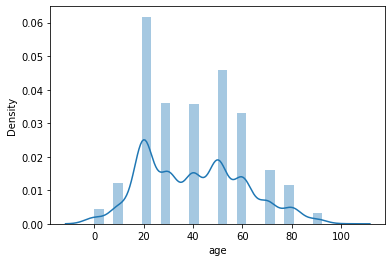

In [95]:
sns.distplot(pat_info['age']) # More people within the age of 20 and 60 were infected

In [96]:
city = pat_info.groupby(['city'], as_index = False).sum()

In [97]:
city

,city,sex,age
0,Andong-si,24.0,1790.0
1,Ansan-si,8.0,520.0
2,Anseong-si,1.0,220.0
3,Anyang-si,18.0,860.0
4,Asan-si,5.0,690.0
5,Bonghwa-gun,18.0,5160.0
6,Bucheon-si,53.0,4120.0
7,Buk-gu,15.0,1010.0
8,Bupyeong-gu,35.0,780.0
9,Busanjin-gu,10.0,620.0


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age', ylabel='city'>

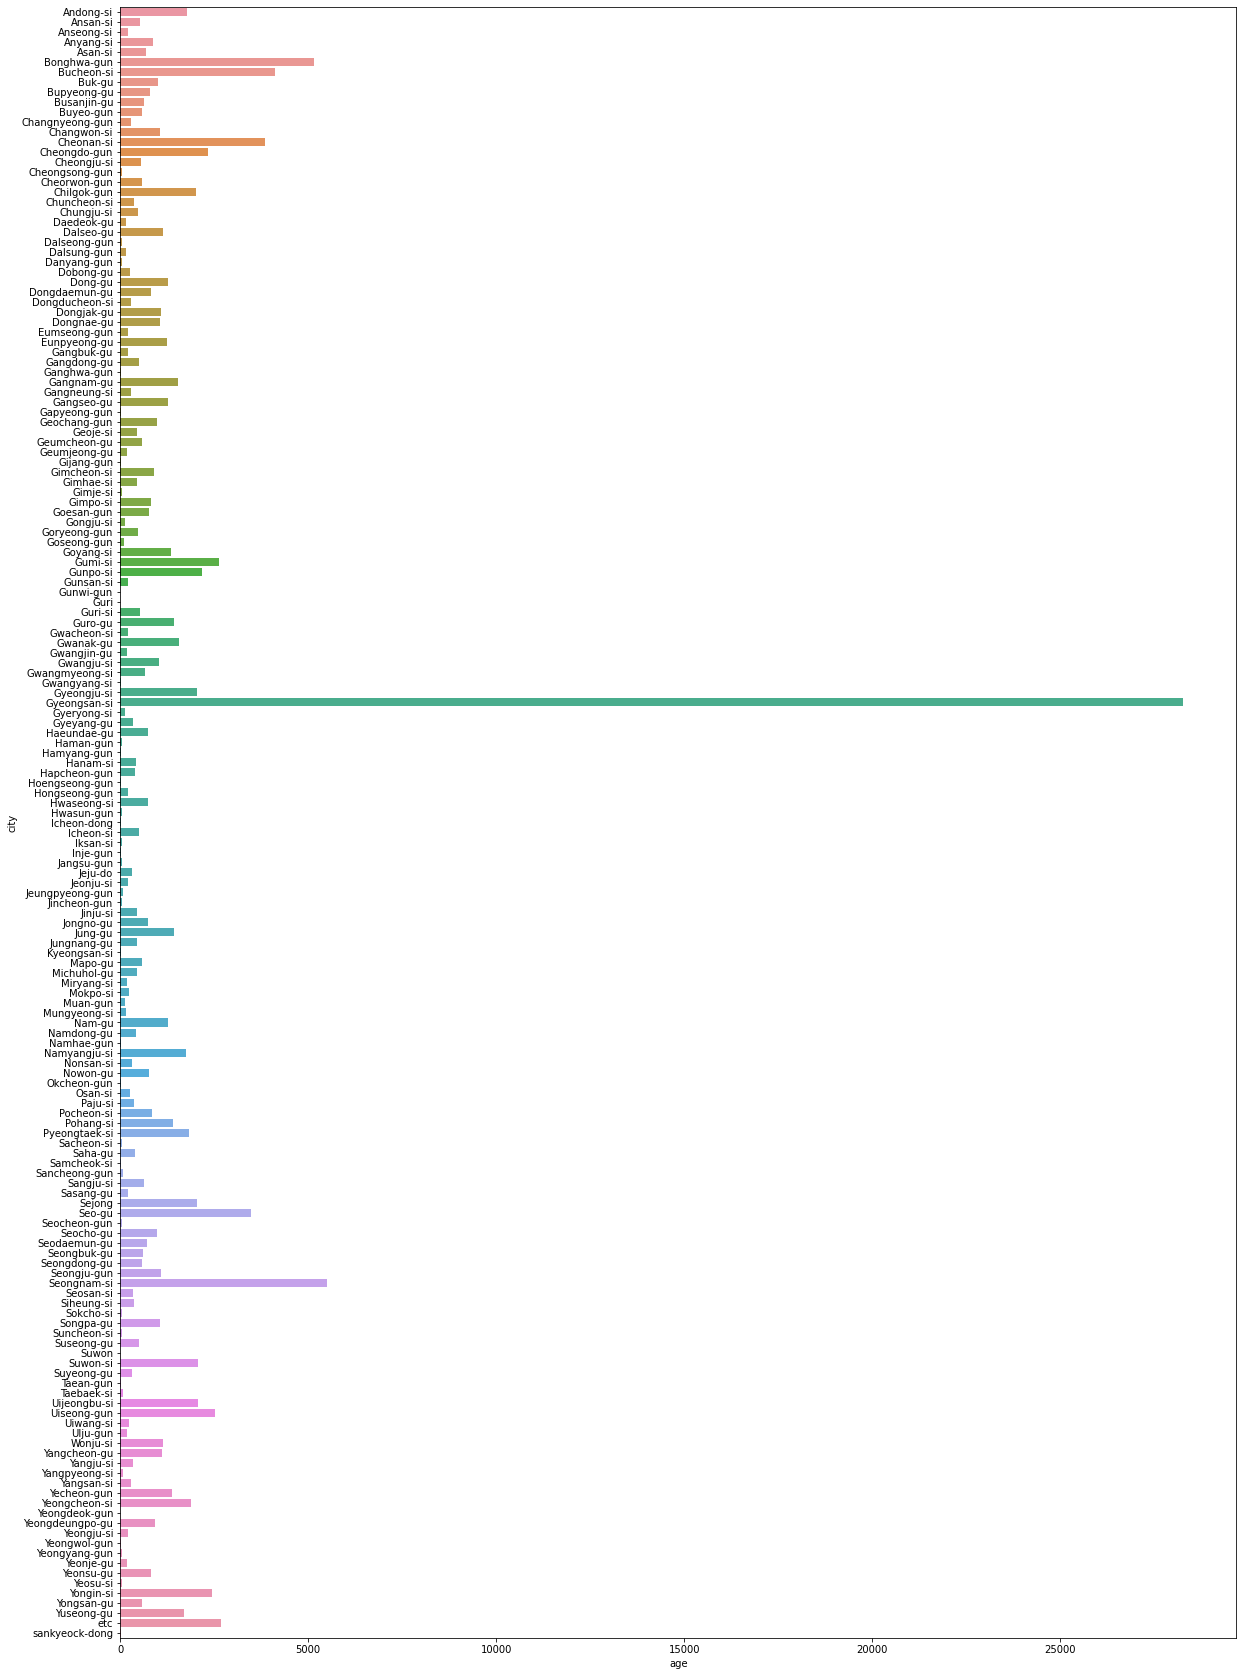

In [101]:
plt.figure(figsize = (20, 30))
sns.barplot('age','city', data = city)

In [ ]:
young = ((PatientInfo.age=='20s') | (PatientInfo.age=='30s'))& (PatientInfo.province=='Seoul')

PatientInfo[young]

In [102]:
young = ((pat_info.age == '20s') | (pat_info.age == '30s')) &(pat_info.province == 'Seoul')

In [104]:
pat_info[young]

TypeError: 'DataFrame' object is not callable

In [91]:
young = (pat_info['age'].groupby(pat_info['20.0'])

KeyError: '20.0'

In [ ]:
grouped = pat_info.groupby('age').get_group('20s')